In [1]:
import torch
import torchvision.models as models

from image_preprocessing import image_loader, masks_loader, plt_images
from neural_style import run_style_transfer

%matplotlib inline

In [2]:
idx = 1
path = 'examples/'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imsize = (512, 512) if torch.cuda.is_available() else (128, 128)

#### Get images

In [3]:
style_img = image_loader(path + 'style/tar{}.png'.format(idx), imsize).to(device, torch.float)
content_img = image_loader(path + 'input/in{}.png'.format(idx), imsize).to(device, torch.float)
input_img = content_img.clone()

style_masks, content_masks = masks_loader(
    path + 'segmentation/tar{}.png'.format(idx),
    path + 'segmentation/in{}.png'.format(idx),
    imsize)

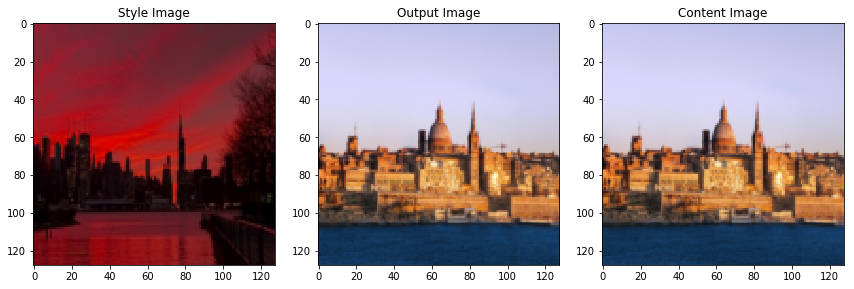

In [4]:
plt_images(style_img, input_img, content_img)

#### Load model

VGG is trained with the following normalization. We use it to normalize our images as well.

In [5]:
vgg = models.vgg19(pretrained=True).features.to(device).eval()

vgg_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
vgg_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

style_layers = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
content_layers = ["conv4_2"]

- - - 

### Pipeline

First, we perform the style transfer without the photorealistic regularization then we add the regularization term.

#### reg=False, num_steps=500

In [6]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=False,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=0,
    num_steps=100,
)

step   50: S: 316.772 C: 17.972 R:0.000
step  100: S: 252.724 C: 14.978 R:0.000
CPU times: user 3min 33s, sys: 29 s, total: 4min 2s
Wall time: 2min 6s


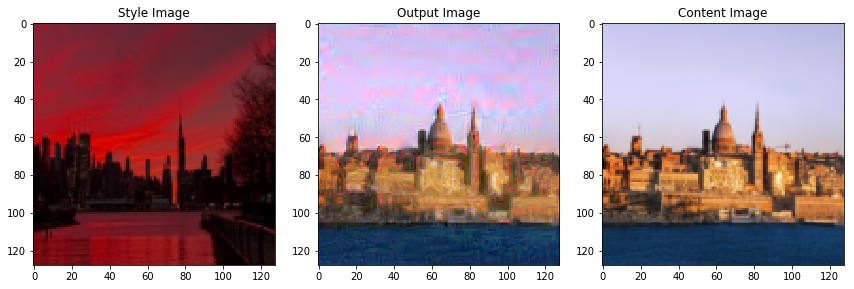

In [7]:
plt_images(style_img, input_img, content_img)

#### reg=True, num_steps=500

In [8]:
%%time

output = run_style_transfer(
    vgg,
    vgg_normalization_mean,
    vgg_normalization_std,
    style_layers,
    content_layers,
    style_img,
    content_img,
    input_img,
    style_masks,
    content_masks,
    device,
    reg=True,
    style_weight=1e6,
    content_weight=1e4,
    reg_weight=1e-4,
    num_steps=100,
)

step   50: S: 196.732 C: 14.013 R:121.755
step  100: S: 162.233 C: 12.473 R:156.939
CPU times: user 3min 35s, sys: 28.7 s, total: 4min 4s
Wall time: 2min 4s


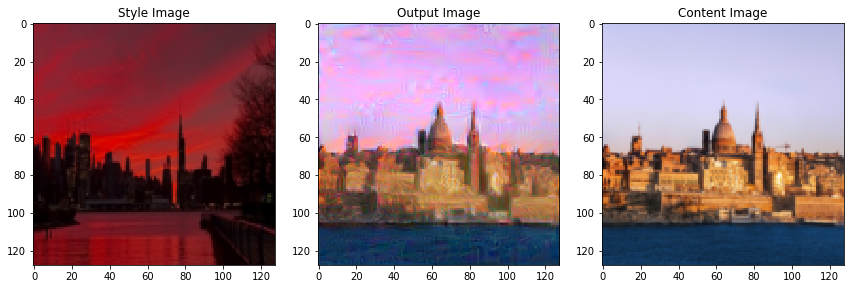

In [9]:
plt_images(style_img, input_img, content_img)